<a href="https://colab.research.google.com/github/skorov48/Financial-algorithms/blob/main/Financial_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

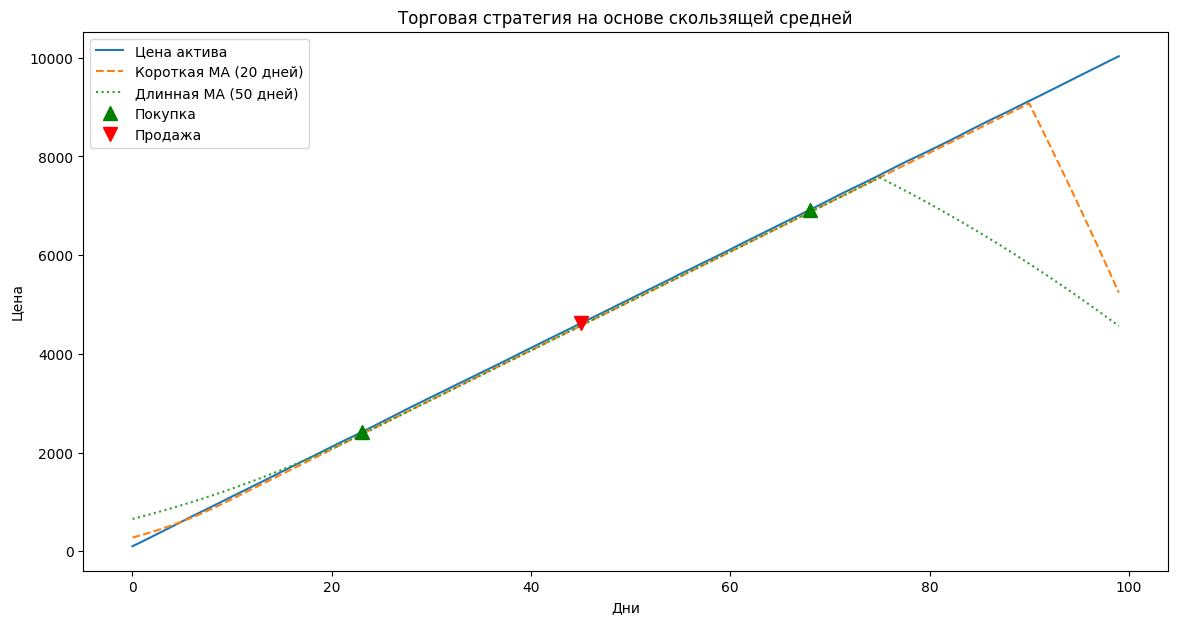

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average_strategy(prices, short_window=20, long_window=50):
    signals = np.zeros(len(prices))
    short_ma = np.convolve(prices, np.ones(short_window)/short_window, mode="same")
    long_ma = np.convolve(prices, np.ones(long_window)/long_window, mode="same")

    for i in range(1, len(prices)):
        if short_ma[i] > long_ma[i] and short_ma[i - 1] <= long_ma[i - 1]:
            signals[i] = 1  # Покупка
        elif short_ma[i] < long_ma[i] and short_ma[i - 1] >= long_ma[i - 1]:
            signals[i] = -1  # Продажа

    plt.figure(figsize=(14, 7))
    plt.plot(prices, label="Цена актива")
    plt.plot(short_ma, label=f"Короткая MA ({short_window} дней)", linestyle="--")
    plt.plot(long_ma, label=f"Длинная MA ({long_window} дней)", linestyle=":")
    plt.plot(np.where(signals == 1)[0], prices[signals == 1], "^", markersize=10, color="g", label="Покупка")
    plt.plot(np.where(signals == -1)[0], prices[signals == -1], "v", markersize=10, color="r", label="Продажа")
    plt.legend()
    plt.title("Торговая стратегия на основе скользящей средней")
    plt.xlabel("Дни")
    plt.ylabel("Цена")
    plt.show()

    return signals

# Пример данных
prices = np.random.normal(100, 2, 100).cumsum()  # Генерируем случайные данные для цены
signals = moving_average_strategy(prices)

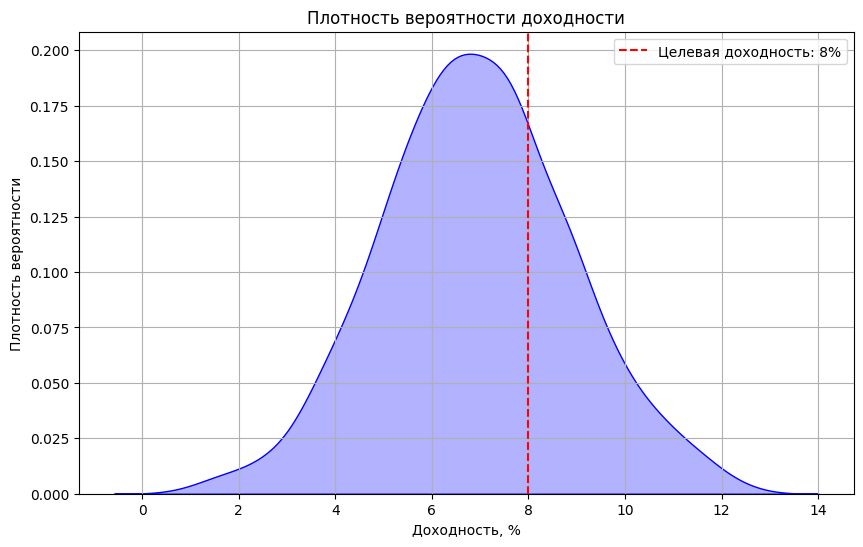

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_probability_density(returns, target_return):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(returns, fill=True, color="blue", alpha=0.3)
    plt.axvline(target_return, color="red", linestyle="--", label=f"Целевая доходность: {target_return}%")
    plt.xlabel("Доходность, %")
    plt.ylabel("Плотность вероятности")
    plt.title("Плотность вероятности доходности")
    plt.legend()
    plt.grid()
    plt.show()

# Пример данных доходности
np.random.seed(0)
returns = np.random.normal(7, 2, 1000)  # генерируем данные с нормальным распределением
target_return = 8
plot_probability_density(returns, target_return)
